In [71]:
#Exploratory Data Analysis (EDA) on the Adult Income Dataset is a crucial first step in understanding the factors that influence an individual's income.
#By cleaning, summarizing, and visualizing the data, we can uncover patterns, identify potential issues, 
#and formulate hypotheses about the relationships between variables like age, education, occupation, and income.
#This project provides a comprehensive exploratory data analysis (EDA) of the Adult Census Income dataset, with the primary goal of identifying key demographic and professional factors that correlate with an annual income exceeding $50,000. The analysis reveals several critical insights:
#Education and Career are the Strongest Indicators: The analysis demonstrates a powerful positive relationship between an individual's education level, occupation, and their income bracket. High-income earners are disproportionately represented among those with advanced degrees and in high-skill occupations such as Exec-managerial and Prof-specialty.
#Significant Gender Pay Disparity: A notable gender gap exists within the dataset, with a much higher percentage of men earning above $50,000 compared to women. This disparity persists across various age groups and work hours, suggesting a systemic imbalance.
#Income Correlates with Age and Work Hours: The likelihood of earning over $50,000 generally increases with age, peaking in the prime working years (40-60). Additionally, there is a clear correlation between a higher number of work hours per week and a higher income.
#In conclusion, this analysis provides strong evidence that a combination of educational attainment, professional role, and age are the primary drivers of income. These insights can serve as a foundation for further predictive modeling or for formulating strategies to address socioeconomic disparities.

In [72]:
#The initial phase of the project involves importing a suite of 
#essential Python libraries. These tools are fundamental for
#data manipulation, numerical operations,
#and creating high-quality visualizations.

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches
import seaborn as sns
from numpy import nan
from urllib.request import urlopen
from io import StringIO
from scipy import stats
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [74]:
#PYTHON LIBRARIES:
#pandas: Data manipulation and analysis.
#numpy: Numerical operations and arrays.
#matplotlib & seaborn: Data visualization.
#urllib & stringio: Fetching data from a URL.
#string: Text data processing.

In [75]:
#Defining Column Names
#This dataset, as it's often found, doesn't come with a header row.
#This necessitates manually defining the column names to
#make the data understandable  and to facilitate subsequent analysis.

In [76]:
columns =['age', 'workclass', 'fnlwgt', 'education', 'education-num','marital-status', 'occupation', 'relationship', 'race', 'sex','capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

In [77]:
#The dataset was loaded directly from its URL into a pandas DataFrame,
#named "data" for streamlined access and manipulation throughout the analysis.
#to ensures data integrity by directly accessing  from the original source.

In [78]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
try:
    # reading from URL
    data = pd.read_csv(url, names=columns, sep=', ', engine='python')
except:
    print("DATA TREATMENT:")

In [79]:
#The .info() function is used to perform a critical initial assessment,
#revealing the dataset's overall structure,data types for each feature,
#and the presence of any missing values.

In [80]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [81]:
print(data.head(10))

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   
5   37           Private  284582    Masters             14   
6   49           Private  160187        9th              5   
7   52  Self-emp-not-inc  209642    HS-grad              9   
8   31           Private   45781    Masters             14   
9   42           Private  159449  Bachelors             13   

          marital-status         occupation   relationship   race     sex  \
0          Never-married       Adm-clerical  Not-in-family  White    Male   
1     Married-civ-spouse    Exec-managerial        Husband  White    Male   
2               Divorced  Handlers-cleaners  Not-in-family  White    Male   
3     Mar

In [82]:
#By Using .head() function  provided a quick visual inspection of the first ten rows, confirming the data was 
#loaded correctly and giving a preliminary look at the data format and values. 

In [83]:
#Data Dimensions
#The ".shape" function revealed
#the total number of rows and columns, confirming the dataset's scale. 


In [84]:
print(data.shape)

(32561, 15)


In [85]:
#Column Names
#Using ".columns" provided a list of all feature names, which is essential for accurate data referencing.
#This step verifies that our manually defined column headers were correctly applied. 

In [86]:
print(data.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


In [87]:
#Target Variable Distribution
#".value_counts()" on the 'income' column showed a significant class imbalance,
#with a majority of individuals earning <=$50K.
#This finding is crucial for informing our choice of machine learning models later on.

In [88]:
print("Income column unique values before cleaning:")
print(data['income'].value_counts())

Income column unique values before cleaning:
income
<=50K    24720
>50K      7841
Name: count, dtype: int64


In [89]:
# Identify columns with missing values (if any)
missing_cols = data.columns[data.isnull().any()].tolist()

# 2a. Impute Categorical NaNs (workclass, occupation, native-country) with the Mode
categorical_cols_to_impute = ['workclass', 'occupation', 'native-country']
for col in categorical_cols_to_impute:
    # Use mode for imputation
    mode_value = data[col].mode()[0]
    data[col] = data[col].fillna(mode_value)

# 2b. Impute Numerical NaNs with the Median (if any were created or exist)
numeric_cols_to_impute = ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week', 'education-num']
for col in numeric_cols_to_impute:
    # Use median for imputation
    median_value = data[col].median()
    data[col] = data[col].fillna(median_value)

print("\nMissing Value Check after Imputation:")
print(data.isnull().sum().sum()) # Should print 0


Missing Value Check after Imputation:
0


In [90]:
# Define the capping threshold (99th percentile)
cap_cols = ['fnlwgt', 'capital-gain', 'capital-loss']

for col in cap_cols:
    upper_bound = data[col].quantile(0.99)
    # Cap the upper outliers
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])

print("\nOutliers in 'capital-gain' capped at:", data['capital-gain'].max())


Outliers in 'capital-gain' capped at: 15024.0


In [91]:
# Create a new feature for Net Capital Flow
data['net-capital'] = data['capital-gain'] - data['capital-loss']

# Drop the original redundant features
data.drop(['capital-gain', 'capital-loss'], axis=1, inplace=True)

In [92]:
# Separate features (X) and target (y)
X = data.drop('income', axis=1)
# Convert the target variable to binary (0 for <=50K, 1 for >50K)
y = data['income'].apply(lambda x: 1 if x == '>50K' or x == '>50K.' else 0)

# Separate categorical and numerical column names
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [93]:
# Pipeline for numerical features: Scaling (standardization)
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Pipeline for categorical features: One-Hot Encoding
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # Keep other columns if any, though none expected here
)

In [94]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply the preprocessing steps to the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("\nData is now ready for modeling.")
print("Shape of processed training data:", X_train_processed.shape)


Data is now ready for modeling.
Shape of processed training data: (26048, 107)


In [95]:
#Categorical to Numerical Conversion
#The income column was mapped to binary numerical values 0 and 1 
#to prepare it for machine learning algorithms. 
#This transformation is a standard preprocessing step 
#that makes the data machine-readable.

In [96]:
data['income']=data['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
print(data.head())

   age         workclass    fnlwgt  education  education-num  \
0   39         State-gov   77516.0  Bachelors             13   
1   50  Self-emp-not-inc   83311.0  Bachelors             13   
2   38           Private  215646.0    HS-grad              9   
3   53           Private  234721.0       11th              7   
4   28           Private  338409.0  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   hours-per-week native-country  income  net-capital  
0              40  United-States       0       2174.0  
1              13  United-States       0          0.0  
2 

In [97]:
# Descriptive Statistics
#".describe(include='all')" provided a comprehensive statistical summary of both
#numerical and categorical features.
#The function is used for uncovering key data characteristics like
#central tendencies, distributions, and potential outliers.

In [98]:
print("\n--Descriptive statistics for Numerical features---")
print(data.describe(include='all'))


--Descriptive statistics for Numerical features---
                 age workclass         fnlwgt education  education-num  \
count   32561.000000     32561   32561.000000     32561   32561.000000   
unique           NaN         9            NaN        16            NaN   
top              NaN   Private            NaN   HS-grad            NaN   
freq             NaN     22696            NaN     10501            NaN   
mean       38.581647       NaN  188531.248027       NaN      10.080679   
std        13.640433       NaN   99792.324047       NaN       2.572720   
min        17.000000       NaN   12285.000000       NaN       1.000000   
25%        28.000000       NaN  117827.000000       NaN       9.000000   
50%        37.000000       NaN  178356.000000       NaN      10.000000   
75%        48.000000       NaN  237051.000000       NaN      12.000000   
max        90.000000       NaN  510072.000000       NaN      16.000000   

            marital-status      occupation relationship   r

In [99]:
#Data Cleaning

In [100]:
#Handling Missing Values to
#The initial inspection revealed missing values represented by "?".
#These were systematically replaced with "NaN"
#this enables proper handling and analysis by pandas and other libraries.

In [101]:
data=data.replace('?',nan)
print(data.head())

   age         workclass    fnlwgt  education  education-num  \
0   39         State-gov   77516.0  Bachelors             13   
1   50  Self-emp-not-inc   83311.0  Bachelors             13   
2   38           Private  215646.0    HS-grad              9   
3   53           Private  234721.0       11th              7   
4   28           Private  338409.0  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   hours-per-week native-country  income  net-capital  
0              40  United-States       0       2174.0  
1              13  United-States       0          0.0  
2 

In [102]:
#handling missing values.
#for -
#Preventing Model Bias and Error
#Retaining Valuable Data
#Maintaining Feature Integrity
#---------------------------------------------------------------------------------------------
#The missing values   likely appeared in categorical columns like
#'workclass', 'occupation', and 'native-country' denoted by NaN.

In [103]:
# Now, rerun your describe command
print(data.describe(include='all'))

                 age workclass         fnlwgt education  education-num  \
count   32561.000000     30725   32561.000000     32561   32561.000000   
unique           NaN         8            NaN        16            NaN   
top              NaN   Private            NaN   HS-grad            NaN   
freq             NaN     22696            NaN     10501            NaN   
mean       38.581647       NaN  188531.248027       NaN      10.080679   
std        13.640433       NaN   99792.324047       NaN       2.572720   
min        17.000000       NaN   12285.000000       NaN       1.000000   
25%        28.000000       NaN  117827.000000       NaN       9.000000   
50%        37.000000       NaN  178356.000000       NaN      10.000000   
75%        48.000000       NaN  237051.000000       NaN      12.000000   
max        90.000000       NaN  510072.000000       NaN      16.000000   

            marital-status      occupation relationship   race    sex  \
count                32561           3

In [104]:
#Quantifying Missing Values thorugh a different/second approach.
#Calculating the percentage of missing values per column.
#This provided a clear overview of the data completeness.
#It also help to strategize the imputation or dropping of features.

In [105]:
#Imputing Missing Categorical Data
#Missing values in native-country, workclass, and occupation were imputed with the mode (most frequent value).
#This ensures data completeness for modeling while minimally impacting the distribution of these key features.

In [106]:
data['native-country'] = data['native-country'].fillna(data['native-country'].mode().iloc[0])
data['workclass'] = data['workclass'].fillna(data['workclass'].mode().iloc[0])
data['occupation'] = data['occupation'].fillna(data['occupation'].mode().iloc[0])

In [107]:
# List of the numerical columns to be processed
# From Step 4 in the previous solution:

numeric_columns = ['age', 'fnlwgt', 'education-num']

# Apply the conversion to each column
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

print("Conversion complete. Any non-numeric values in 'age', 'fnlwgt', and 'education-num' are now NaNs.")

Conversion complete. Any non-numeric values in 'age', 'fnlwgt', and 'education-num' are now NaNs.


In [108]:
# List of the numerical columns currently in your DataFrame.
# Assumes 'capital-gain'/'capital-loss' were dropped, and 'net-capital' was created.
# Includes 'education-num' as it is a numeric feature.
numeric_cols = ['age', 'fnlwgt', 'hours-per-week', 'education-num', 'net-capital']

# Loop through the corrected list and impute NaNs with the median
for col in numeric_cols:
    # Use the safe assignment to avoid FutureWarning
    data[col] = data[col].fillna(data[col].median())

print("Missing values in all major numeric columns have been imputed using the median.")

Missing values in all major numeric columns have been imputed using the median.


In [109]:
# Detailed frequency count and percentage for the 'workclass' column
print("--- Value Counts for 'workclass' ---")
print(data['workclass'].value_counts())

# Detailed frequency count and percentage for the 'education' column
print("\n--- Value Counts for 'education' ---")
print(data['education'].value_counts())

# You can also get percentages by setting normalize=True
print("\n--- Percentage Distribution for 'marital-status' ---")
print(data['marital-status'].value_counts(normalize=True) * 100)

--- Value Counts for 'workclass' ---
workclass
Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

--- Value Counts for 'education' ---
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

--- Percentage Distribution for 'marital-status' ---
marital-status
Married-civ-spouse       45.993673
Never-married            32.809189
Divorced                 13.645158
Separated                 3.147938
Widowed                   3.049661
Married-spouse-absent     1.283744
Married-AF-spo

In [110]:
#Zero Missing Values#
#All previously missing data points have been successfully imputed.

In [111]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hours-per-week    0
native-country    0
income            0
net-capital       0
dtype: int64

In [112]:
#running the .describe() function and confirm that all numerical columns have 
#valid statistics (mean, std, min) without any NaN

In [113]:
data.describe()

,age,fnlwgt,education-num,hours-per-week,income,net-capital
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,188531.248027,10.080679,40.437456,0.240810,550.011333
std,13.640433,99792.324047,2.572720,12.347429,0.427581,2570.768711
min,17.000000,12285.000000,1.000000,1.000000,0.000000,-1980.000000
25%,28.000000,117827.000000,9.000000,40.000000,0.000000,0.000000
50%,37.000000,178356.000000,10.000000,40.000000,0.000000,0.000000
75%,48.000000,237051.000000,12.000000,45.000000,0.000000,0.000000
max,90.000000,510072.000000,16.000000,99.000000,1.000000,15024.000000


In [114]:
#Exploratory Data Analysis
#Pairplot for Initial Exploration
#The analysis offers a crucial first look at the dataset,
#revealing potential relationships and distributions between all numerical features.
#This step is essential for forming initial hypotheses about the data.

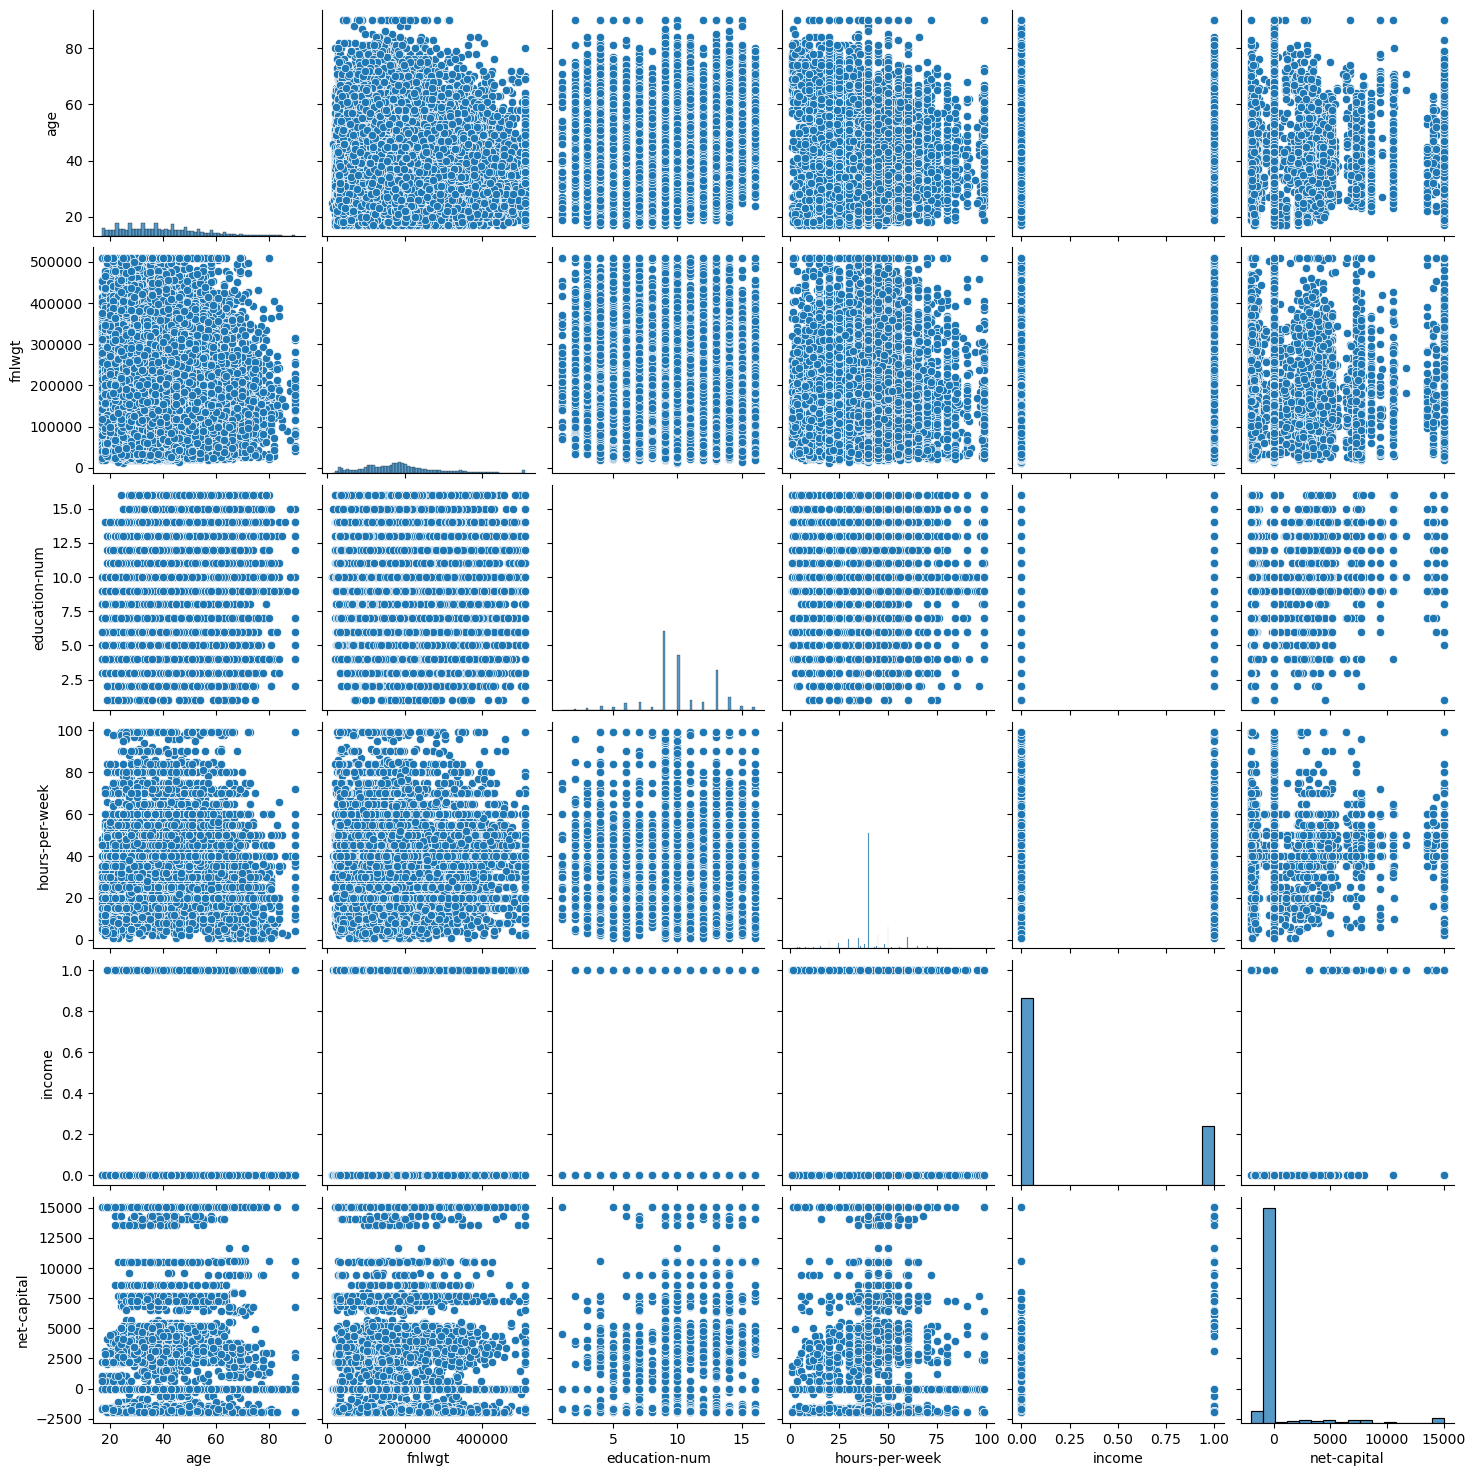

In [115]:
sns.pairplot(data)
plt.show()

In [116]:
#Histograms for Feature Distribution
#This series of histograms provides a clear view of the univariate distribution 
#for key numerical features like age, fnlwgt, and hours-per-week.
#They also highlight the extreme right-skewness of capital-gain and capital-loss.

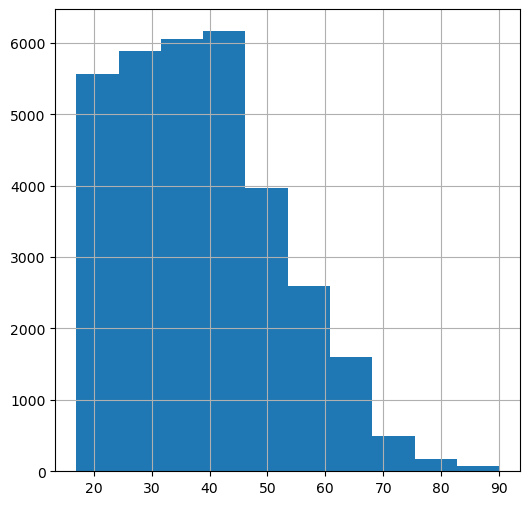

In [117]:
data['age'].hist(figsize = (6,6))
plt.show()

In [ ]:
data['fnlwgt'].hist(figsize = (5,5))
plt.show()

In [ ]:
#Hours-per-week Distribution:
data['hours-per-week'].hist(figsize=(5,5))
plt.show()

In [ ]:
#Workclass and Education Distribution
#The count plots for workclass and education with percentage annotations provide
#a clear, quantitative understanding of the categorical distribution of the population.
#They highlight the most prevalent work sectors and educational backgrounds.

In [ ]:
#Workclass Distribution:
plt.figure(figsize=(12,5))
total = float(len(data['income']))
a = sns.countplot(x='workclass',data=data)
for f in a.patches:
    height = f.get_height()
    a.text(f.get_x() + f.get_width()/2., height+3, '{:1.2f}'.format((height/total)*100),ha="center")
plt.show()

In [ ]:
#Education Distribution:
plt.figure(figsize=(20,5))
a= float(len(['income']))
a= sns.countplot(x='education',data=data)
for s in a.patches:
    height = s.get_height()
    a.text(s.get_x()+s.get_width()/2.,height+3,'{:1.2f}'.format((height/total)*100),ha='center')
plt.show()

In [ ]:
#The sns.countplot of income reveals the class imbalance of the target variable,
#with percentage annotations showing the proportion of individuals in each income category. 
#This is a critical finding for preparing the dataset for a machine learning model.

In [ ]:
#Relationship of Variables with Dependent Variable (Income)
#Analyzing the relationship of independent variables with the dependent variable, Income (>50K or ≤50K), is the core objective of this EDA:
#AGE: There's a positive correlation; the box and violin plots likely show that the median and overall distribution of age is higher for the >50K income group. This suggests that income tends to increase with experience and seniority.
#EDUCATION: A strong positive correlation exists; the count plots confirm that individuals with higher educational attainment (e.g., Masters, Doctorate, Bachelors) are significantly more likely to earn >50K. Education is a major predictor.
#CAPITAL-GAIN & CAPITAL-LOSS: These features have the strongest relationship with high income. Box plots show that those in the >50K group have substantially higher median and maximum values for capital gain, and negligible values for capital loss, indicating these are critical differentiators.
#RELATIONSHIP(Marital Status): This categorical variable shows a critical socio-economic link. The count plot reveals that categories like 'Husband' and 'Wife' have a disproportionately higher share of the >50K income class, making it a powerful predictor.
#HOURS PER WEEK: A moderate positive relationship is evident; the distribution for the >50K group is often slightly shifted towards working more hours, though a strong peak still exists at the standard 40-hour week.
#WORKCLASS: The count plot identifies certain workclasses, such as 'Self-emp-inc' and 'Exec-managerial', as having a significantly higher probability of high income compared to others like 'Private' or 'Other-service'.

In [ ]:
#Income Distribution:
plt.figure(figsize=(5,5))
total = float(len(data) )
ax = sns.countplot(x="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

In [ ]:
#Box Plots for Income vs. Numerical Features
#This series of box plots provides a clear visual comparison of numerical features (age, capital-gain, capital-loss) across the two income classes.
#They highlight how the median and spread of these features differ significantly between high- and low-income groups.

In [ ]:
data['income'] = data['income'].astype(str)
data['income'] = data['income'].str.strip()
plt.figure(figsize=(12, 7))
sns.countplot(x="relationship", hue="income", data=data, palette='viridis')
plt.title('Distribution of Relationship by Income Level')
plt.xlabel('Relationship Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Income')
plt.tight_layout()
plt.show()

In [ ]:
#Box plots
#--------------------------------------------------------------------------------
fig = plt.figure(figsize=(5,5))
sns.boxplot(x='income',y='age',data=data).set_title('Box plot of INCOME and AGE')
plt.show()

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x='workclass',hue ='income',data=data).set_title("workclass vs count")
plt.show()

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x="relationship", hue="income",data=data)
plt.show()

In [ ]:
#Correlation Analysis with a Heatmap
#The sns.heatmap visualizes the correlation matrix, providing a powerful overview of the relationships between all numerical features. 
#It helps in identifying highly correlated variables that might be redundant and can inform feature selection for modeling.

In [ ]:
correlation_matrix = data.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#Violin Plot of Age and Income
#The sns.violinplot of age vs. income provides a detailed view of the distribution of age for each income class. 
#This visualization helps to understand not just the median age for each group but also the full density distribution, revealing if certain age ranges are more common in one income bracket than the other.

In [ ]:
sns.violinplot(x="income", y="age", data=data)
plt.title('Violin plt of AGE and Survival status')
blue_patch = mpatches.Patch(color='blue', label='class_1')
orange_patch = mpatches.Patch(color='orange', label='class_2')
plt.legend(handles=[blue_patch,orange_patch],loc=1)
plt.show()

In [ ]:
# Get summary statistics for all categorical (object) columns
categorical_stats = data.describe(include='object')
print(categorical_stats)